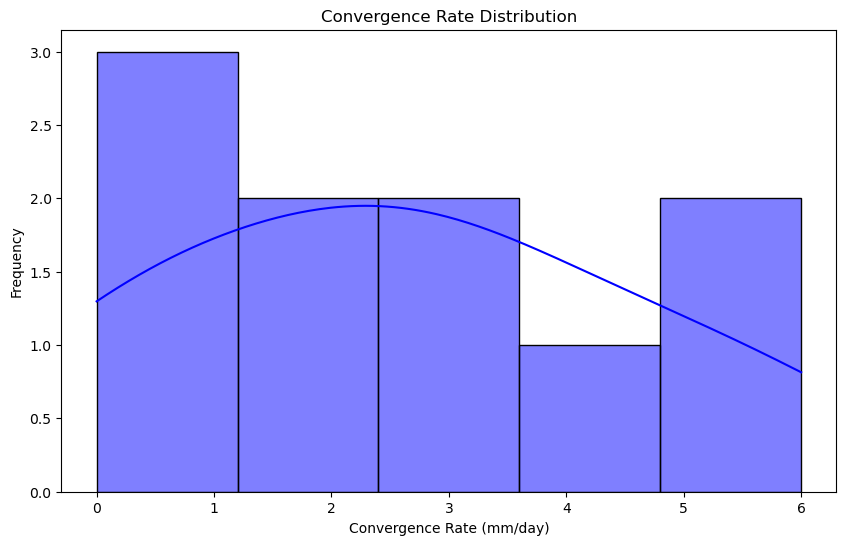

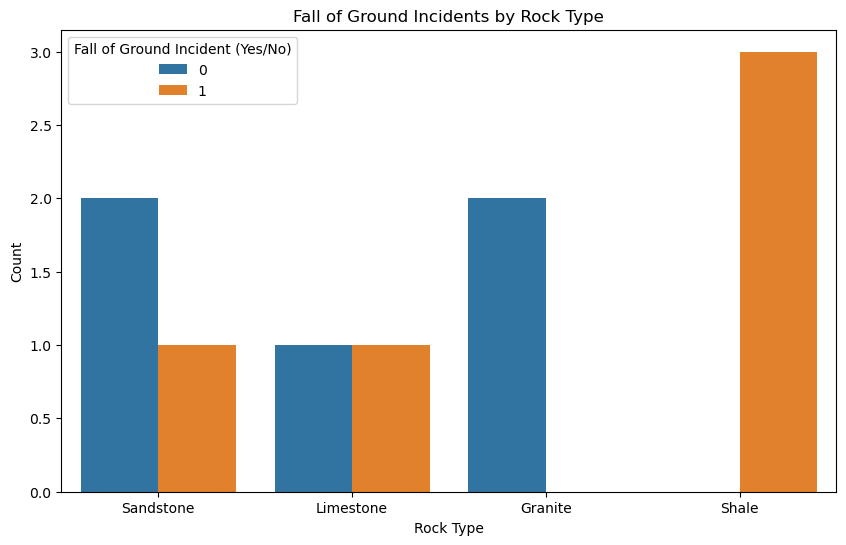

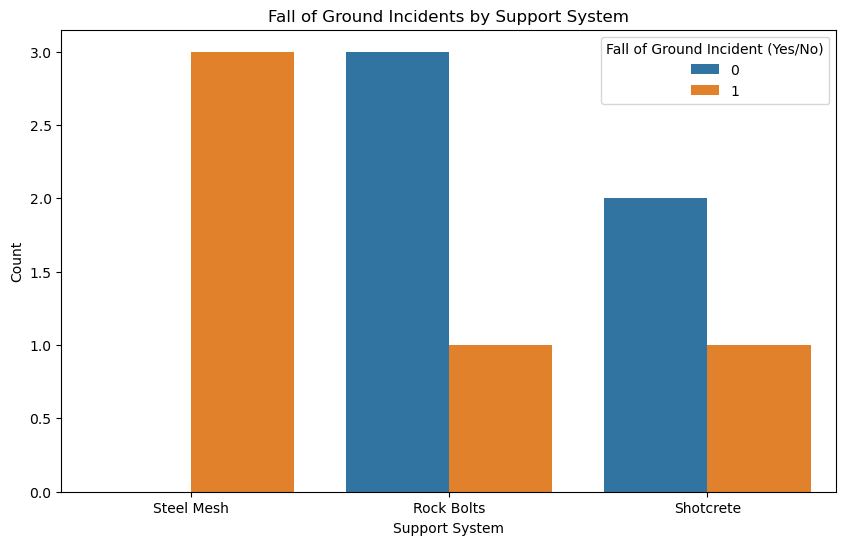

Chi-squared test between Support System and Fall of Ground Incident: p-value = 0.11455884399268768
There is no significant correlation between Support System and Fall of Ground Incident.
Chi-squared test between Rock Type and Fall of Ground Incident: p-value = 0.14895400671141978
There is no significant correlation between Rock Type and Fall of Ground Incident.


C:\Users\rntzq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rntzq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rntzq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

[[2 0]
 [1 0]]


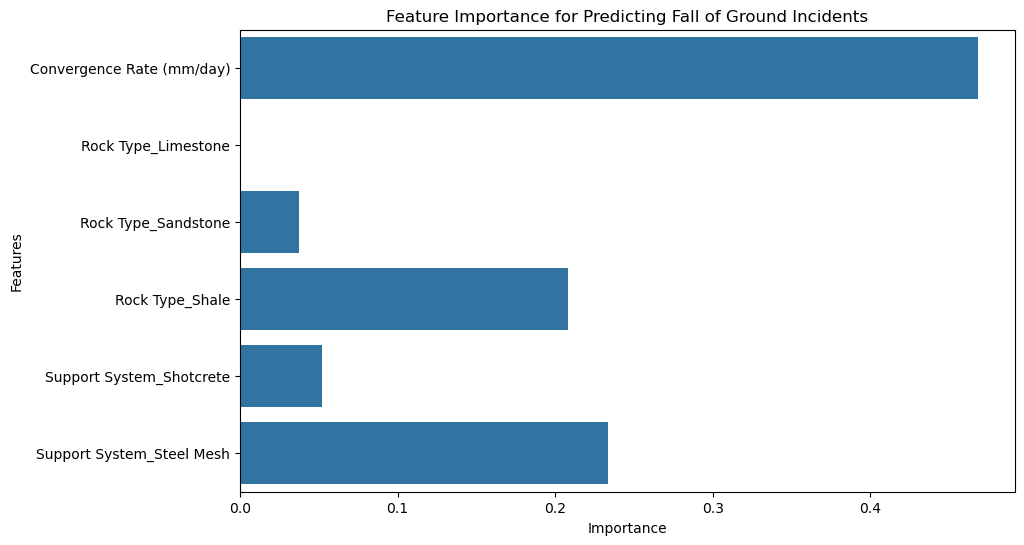

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = {
    'Rock Type': ['Sandstone', 'Limestone', 'Granite', 'Shale', 'Sandstone', 'Limestone', 'Shale', 'Granite', 'Sandstone', 'Shale'],
    'Support System': ['Steel Mesh', 'Rock Bolts', 'Shotcrete', 'Steel Mesh', 'Rock Bolts', 'Shotcrete', 'Steel Mesh', 'Rock Bolts', 'Shotcrete', 'Rock Bolts'],
    'Convergence Rate (mm/day)': [5, 2, 0, 3, 1, 4, 6, 2, 0, 3],
    'Fall of Ground Incident (Yes/No)': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Data Preprocessing
df['Fall of Ground Incident (Yes/No)'] = df['Fall of Ground Incident (Yes/No)'].map({'Yes': 1, 'No': 0})

# 1. Exploratory Data Analysis (EDA)

# Visualize distribution of convergence rates
plt.figure(figsize=(10,6))
sns.histplot(df['Convergence Rate (mm/day)'], kde=True, color='blue')
plt.title('Convergence Rate Distribution')
plt.xlabel('Convergence Rate (mm/day)')
plt.ylabel('Frequency')
plt.show()

# Visualize incident counts based on rock type
plt.figure(figsize=(10,6))
sns.countplot(x='Rock Type', hue='Fall of Ground Incident (Yes/No)', data=df)
plt.title('Fall of Ground Incidents by Rock Type')
plt.xlabel('Rock Type')
plt.ylabel('Count')
plt.show()

# Visualize incident counts based on support system
plt.figure(figsize=(10,6))
sns.countplot(x='Support System', hue='Fall of Ground Incident (Yes/No)', data=df)
plt.title('Fall of Ground Incidents by Support System')
plt.xlabel('Support System')
plt.ylabel('Count')
plt.show()

# 2. Correlation Analysis

# Correlation between support system type and incident frequency
contingency_table = pd.crosstab(df['Support System'], df['Fall of Ground Incident (Yes/No)'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared test between Support System and Fall of Ground Incident: p-value = {p}")
if p < 0.05:
    print("There is a significant correlation between Support System and Fall of Ground Incident.")
else:
    print("There is no significant correlation between Support System and Fall of Ground Incident.")

# Correlation between rock type and incident frequency
contingency_table = pd.crosstab(df['Rock Type'], df['Fall of Ground Incident (Yes/No)'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared test between Rock Type and Fall of Ground Incident: p-value = {p}")
if p < 0.05:
    print("There is a significant correlation between Rock Type and Fall of Ground Incident.")
else:
    print("There is no significant correlation between Rock Type and Fall of Ground Incident.")

# 3. Risk Mapping (Predictive Analysis)

# Features and target variable
X = df[['Convergence Rate (mm/day)', 'Rock Type', 'Support System']]
y = df['Fall of Ground Incident (Yes/No)']

# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 4. Visualize Feature Importance
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance for Predicting Fall of Ground Incidents')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
